## Visualizing Time Series Data

Some time series visualizations

In [1]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv("datasets/starbucks.csv",
                index_col='Date', parse_dates=True)

print(df.head())

              Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548


In [3]:
# to view the index
print(df.index)  # It is already parsed as dates

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


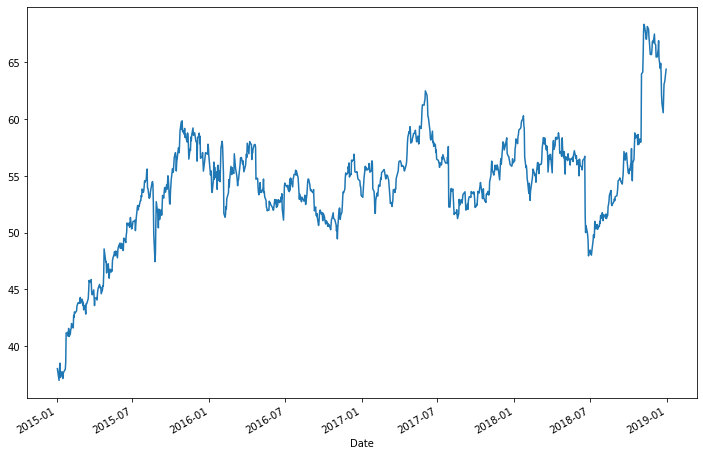

In [8]:
# we will plot the Close
plt.figure(figsize=(12, 8))
df['Close'].plot();

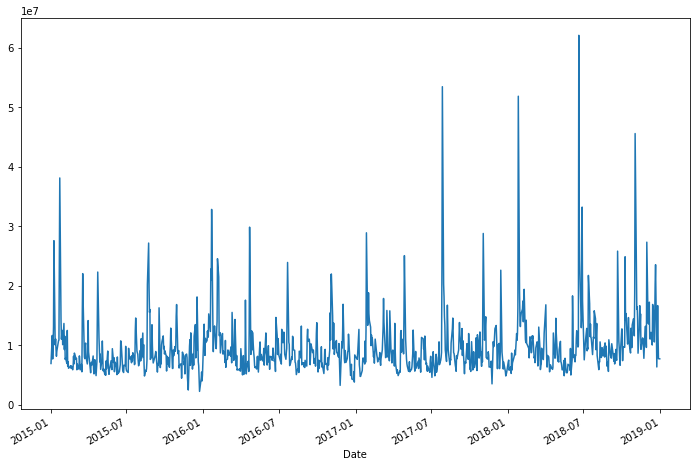

In [9]:
# plot the Volume
plt.figure(figsize=(12, 8))
df['Volume'].plot();

### Plot formatting

#### Adding a title and axis labels

<div class="alert alert-info"><strong>NOTE:</strong> While we <em>can</em> pass a title into the pandas <tt>.plot()</tt> function, we can't pass x- and y-axis labels.<br>However, since <tt>.plot()</tt> returns a <tt>matplotlib.axes.AxesSubplot</tt> object, we can set the labels<br>on that object so long as we do it in the same jupyter cell. Setting an <tt>autoscale</tt> is done the same way.</div>

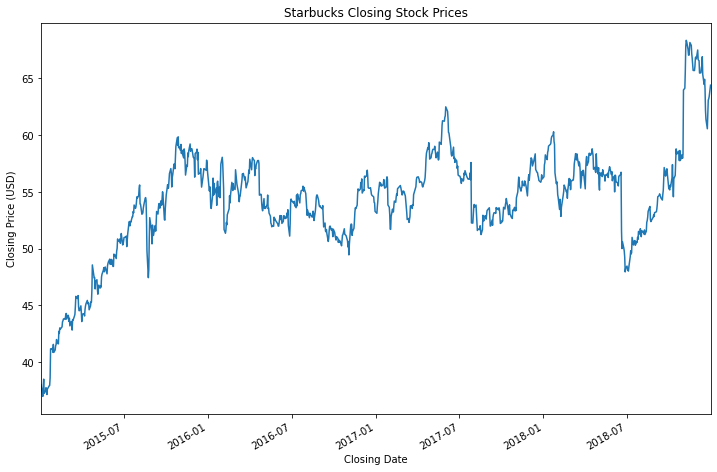

In [7]:
title = 'Starbucks Closing Stock Prices'
ylabel = 'Closing Price (USD)'
xlabel = 'Closing Date'

ax = df['Close'].plot(figsize=(12, 8), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

#### Choosing X Limits by Slice

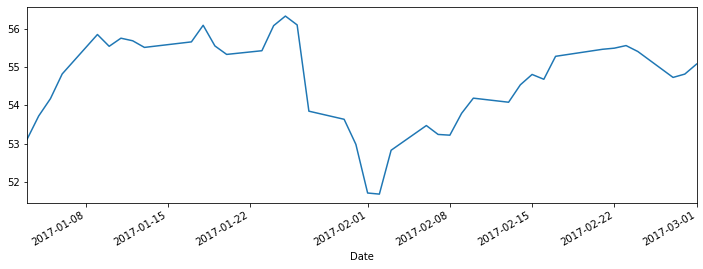

In [10]:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12, 4)).autoscale(axis='x', tight=True)

#### Choosing X Limits by Arguments

<AxesSubplot:xlabel='Date'>

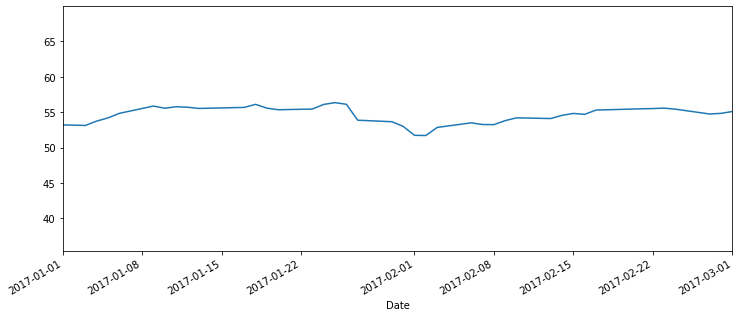

In [11]:
df['Close'].plot(figsize=(12, 5), xlim=['2017-01-01', '2017-03-01'])

Now let's focus on the y-axis limits to get a better sense of the shape of the data.
First we'll find out what upper and lower limits to use.

In [12]:
# Find the minimum value in the range
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [13]:
# Find the maximum value in the range
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

<AxesSubplot:xlabel='Date'>

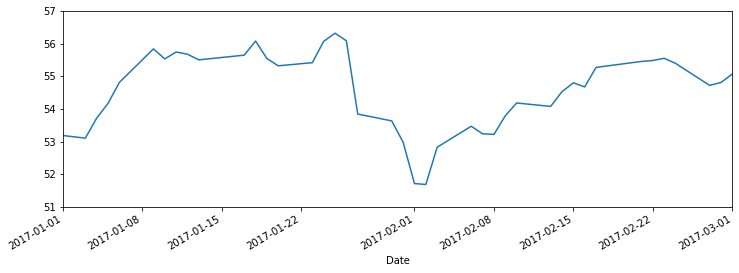

In [14]:
# We can use these as Y-limit values
df['Close'].plot(figsize=(12, 4), xlim=['2017-01-01', '2017-03-01'], ylim=[51, 57])

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. The above chart might lead you to believe that stocks were many times more valuable in January 2017 than in early February, but a look at them with the y-axis minimum set to zero tells a different story:</div>

<AxesSubplot:xlabel='Date'>

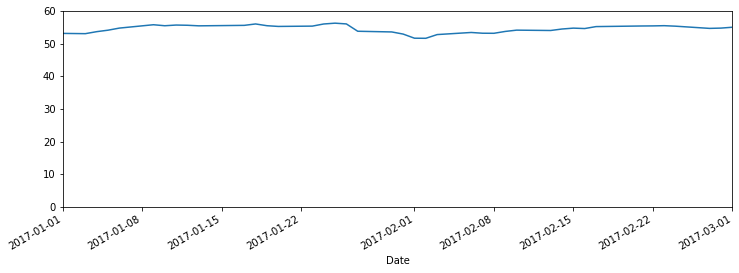

In [15]:
df['Close'].plot(figsize=(12, 4), xlim=['2017-01-01', '2017-03-01'], ylim=[0, 60])

<div class="alert alert-info"><strong>REMEMBER:</strong> <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt> is unnecessary if axis limits have been passed into <tt>.plot()</tt>.<br>
If we were to add it, autoscale would revert the axis limits to the full dataset.</div>

### Title and Axis labels

[Text(0.5, 0, 'Closing Date'), Text(0, 0.5, 'Closing Price (USD)')]

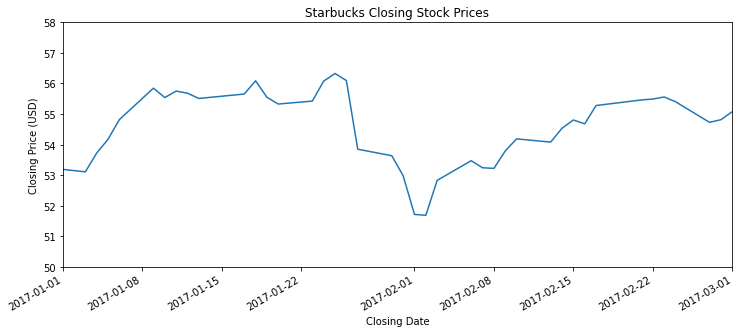

In [16]:
title = 'Starbucks Closing Stock Prices'
ylabel = 'Closing Price (USD)'
xlabel = 'Closing Date'

ax = df['Close'].plot(figsize=(12, 5), title=title, xlim=['2017-01-01', '2017-03-01'], 
                     ylim=[50, 58])
ax.set(xlabel=xlabel, ylabel=ylabel)

### Color & Style

We can pass arguments into .plot() to change the linestyle and color. Refer to the Customizing Plots lecture from the previous section for more options.

<AxesSubplot:xlabel='Date'>

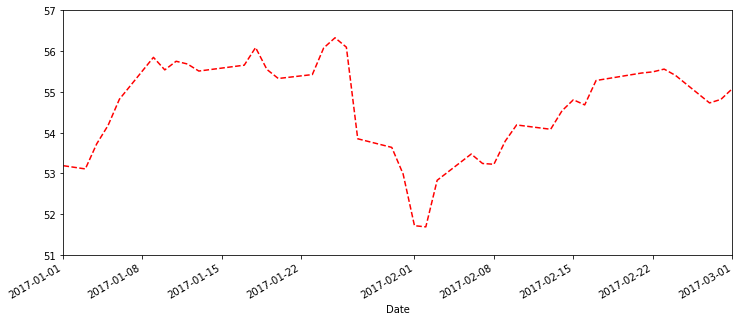

In [17]:
df['Close'].plot(figsize=(12, 5), xlim=['2017-01-01', '2017-03-01'], ylim=(51, 57), ls='--', c='r')

### X Ticks

In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from matplotlib called dates.

In [18]:
from matplotlib import dates

#### Set the spacing

The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with .set_major_locator().

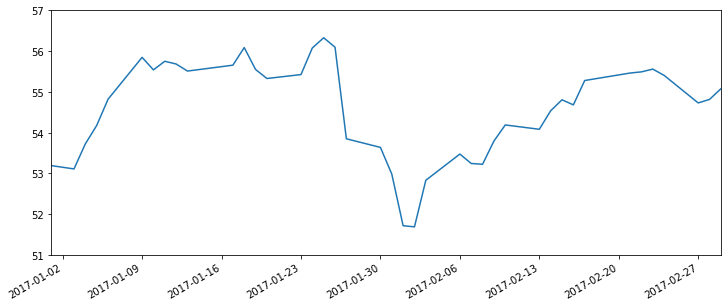

In [19]:
# Create our AXIS object
ax = df['Close'].plot(figsize=(12, 5), xlim=['2017-01-01', '2017-03-01'], ylim=[51, 57])

# We will remove Pandas default Date label
ax.set(xlabel='')

# Set the tick locator and formatter for the major axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with byweekday=0, or Mondays.
For a full list of locator options available from matplotlib.dates visit https://matplotlib.org/api/dates_api.html#date-tickers

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>

In [20]:
# We will experiment with different formats
from datetime import datetime

datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

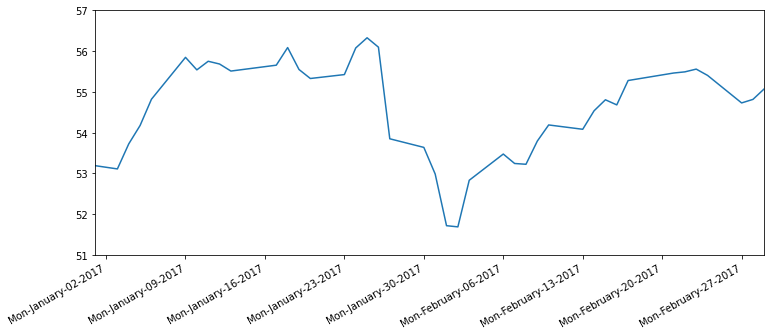

In [21]:
ax = df['Close'].plot(figsize=(12, 5), xlim=['2017-01-01', '2017-03-01'], ylim=[51, 57])
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d-%Y"))

### Major vs Minor Axis Values

All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the minor axis, perhaps to separate month names from days of the month.

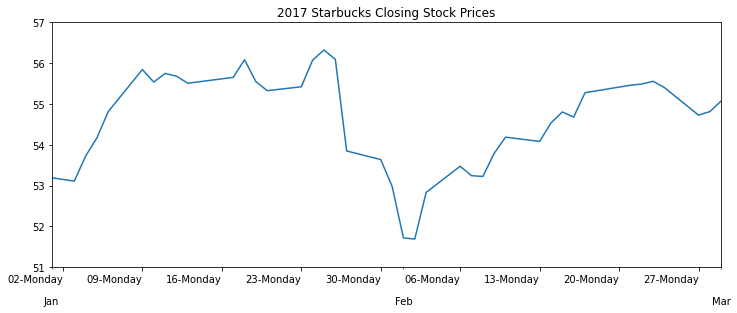

In [22]:
ax = df['Close'].plot(figsize=(12, 5), xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,
                      title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%A'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

<font color=green><strong>NOTE: </strong>we passed a rotation argument <font color=black><strong>rot=0</strong></font> into <tt><font color=black>df.plot()</font></tt> so that the major axis values appear horizontal, not slanted.

### Adding Gridlines

We can add x and y axis gridlines that extend into the plot from each major tick mark.

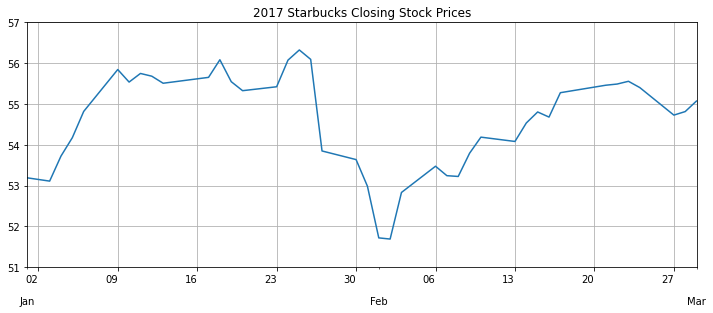

In [23]:
ax = df['Close'].plot(figsize=(12, 5), xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,
                      title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)